In [449]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from sklearn import preprocessing
from statsmodels.graphics.regressionplots import *

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns

from scipy.stats import ttest_ind

sns.set_context('notebook')

In [450]:
total_set = pd.read_csv('../data/raw/album_ratings.csv')

In [451]:
# Select for the years we'll analyze
post_70_set = total_set[(total_set['Release Year'] > 1970) & (total_set['Release Year'] < 2020) ]

# Remove columns with missing critical values
post_70_set = post_70_set.dropna(subset='Release Month')
post_70_set = post_70_set.dropna(subset='Genre')

# Adjust this score to be on a 100-point scale like the other score columns, instead of a 10-point scale
post_70_set['Metacritic User Score'] = post_70_set['Metacritic User Score'] * 10

# Create some more useful columns
post_70_set['Mean AOTY Score'] = post_70_set[['AOTY Critic Score', 'AOTY User Score']].mean(axis=1)
post_70_set['Release Decade'] = post_70_set['Release Year'] - post_70_set['Release Year'] % 10

# Order rows by month for happier histogramizationizing
month_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, \
               'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
post_70_set.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)

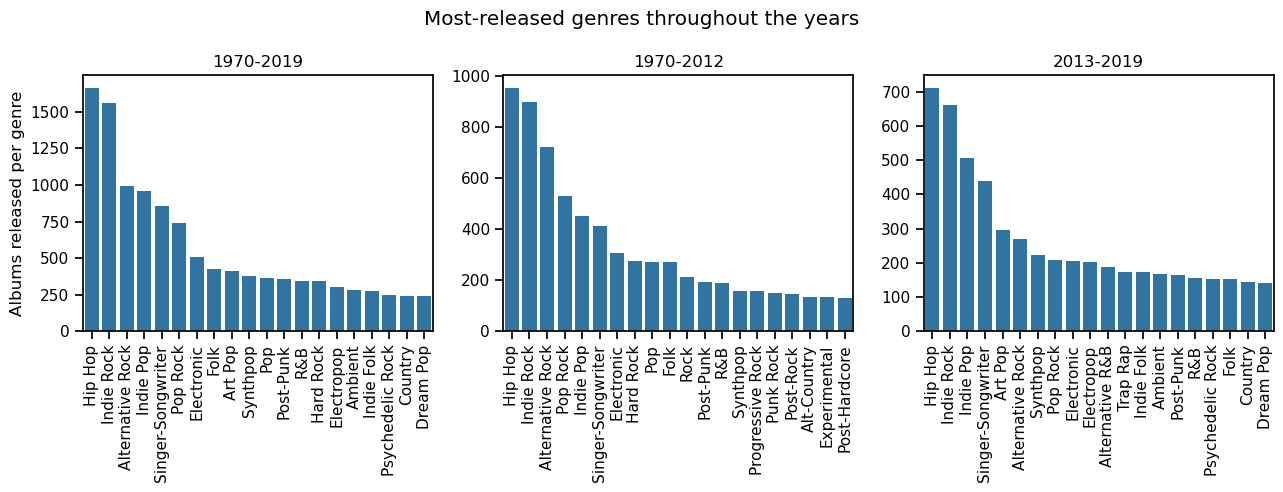

In [452]:
# Let's make some useful lists, starting with a list of the top genres.

# Looks like there's a decent knee after about 6 on all charts.

genre_counts = post_70_set['Genre'].value_counts()
post_2013_genre_counts = post_70_set[post_70_set['Release Year']>=2013]['Genre'].value_counts()
pre_2013_genre_counts = post_70_set[post_70_set['Release Year']<2013]['Genre'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))

sns.barplot(data=genre_counts[:20], ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('1970-2019')
ax1.set_ylabel('Albums released per genre')

sns.barplot(data=pre_2013_genre_counts[:20], ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('1970-2012')
ax2.set_ylabel('')

sns.barplot(data=post_2013_genre_counts[:20], ax=ax3)
ax3.tick_params(axis='x', rotation=90)
ax3.set_title('2013-2019')
ax3.set_ylabel('')

plt.suptitle('Most-released genres throughout the years')
plt.tight_layout()
plt.show()

In [453]:
common_genres = set()

for genre in genre_counts[:6].keys() :
    common_genres.add(genre)

for genre in pre_2013_genre_counts[:6].keys() :
    common_genres.add(genre)

for genre in post_2013_genre_counts[:6].keys() :
    common_genres.add(genre)

common_genres

{'Alternative Rock',
 'Art Pop',
 'Hip Hop',
 'Indie Pop',
 'Indie Rock',
 'Pop Rock',
 'Singer-Songwriter'}

Time to Put the Art in Chart
---

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2254865925.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


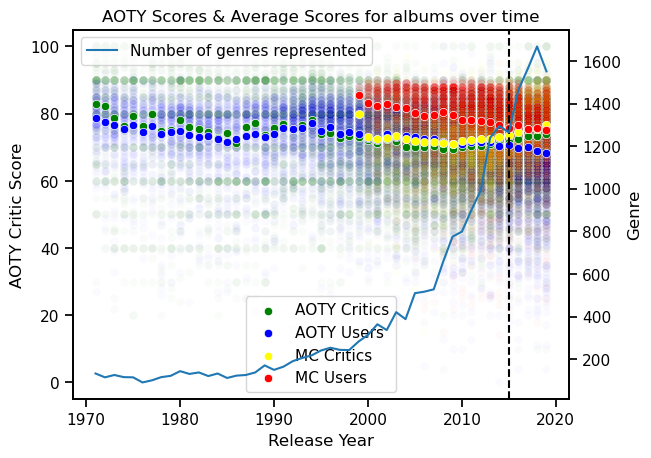

In [454]:
# This chart is too much

fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="Green", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="Blue", alpha=0.02, ax=ax)

sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic Critic Score', color="Yellow", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic User Score', color="Red", alpha=0.02, ax=ax)

plt.title('AOTY Scores & Average Scores for albums over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='AOTY Critics', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='AOTY Users', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic Critic Score', color='Yellow', label='MC Critics', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic User Score', color='Red', label='MC Users', ax=ax)

count_df = post_70_set.groupby('Release Year').count()

ax2 = ax.twinx()

sns.lineplot(data=count_df, x='Release Year', y='Genre', label='Number of genres represented')

ax.axvline(x=2015, color='Black', linestyle='--')

plt.legend()
plt.show()

Text(0.5, 1.0, 'AOTY Critic Ratings vs User Ratings')

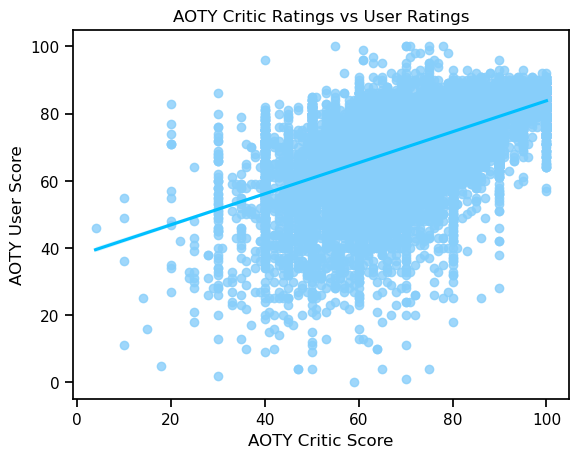

In [455]:
# Critic scores vs user scores.

sns.regplot(data=total_set, x='AOTY Critic Score', y='AOTY User Score', color='lightskyblue', line_kws={'color':'deepskyblue'})
plt.title('AOTY Critic Ratings vs User Ratings')

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\575592172.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = total_set.groupby('Release Year').mean()


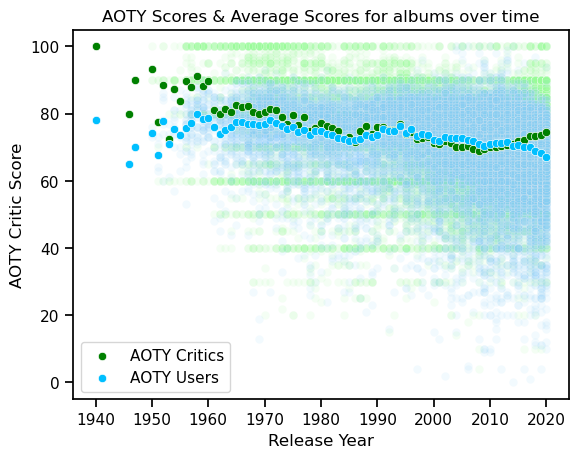

In [456]:
# Critic/user mean scores over time.

sns.scatterplot(data=total_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.1)
sns.scatterplot(data=total_set, x='Release Year', y='AOTY User Score', color="lightskyblue", alpha=0.1)

plt.title('AOTY Scores & Average Scores for albums over time')

mean_df = total_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='green', label='AOTY Critics')
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='deepskyblue', label='AOTY Users')

plt.legend()
plt.show()

<Axes: >

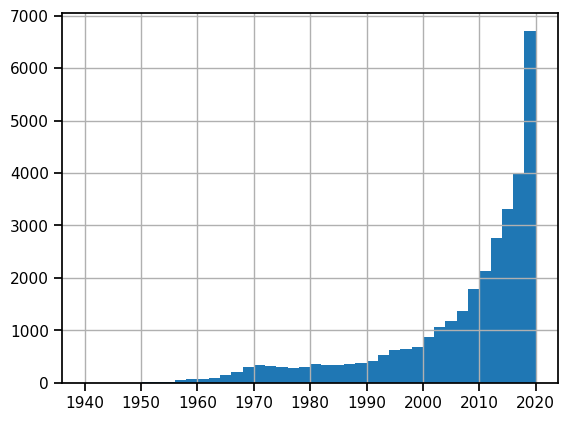

In [457]:
# Albums released per year.

total_set['Release Year'].hist(bins=40)

In [458]:
# Genres represented in each year

yearly_genre_counts = pd.DataFrame(index = range(1940, 2021))

for year in range(1940, 2021) :
    current_df = total_set[total_set['Release Year']==year]
    count = len(current_df['Genre'].value_counts())
    yearly_genre_counts.loc[year, 'Count'] = count

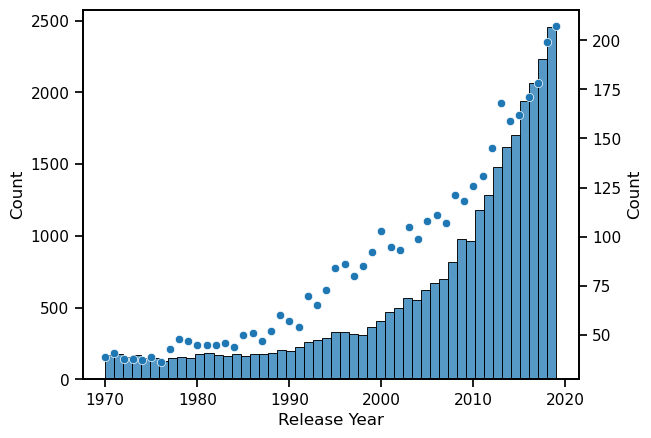

In [459]:
timed_total = total_set[(total_set['Release Year'] >= 1970) & (total_set['Release Year'] < 2020)]
timed_genre_counts = yearly_genre_counts.loc[1970:2019]


fig, ax1 = plt.subplots()

sns.histplot(timed_total['Release Year'], bins=50, ax=ax1)

ax2 = ax1.twinx()

sns.scatterplot(x=timed_genre_counts.index, y=timed_genre_counts['Count'], ax=ax2)

plt.show()



C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2228425637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2228425637.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = timed_total.groupby('Release Month').mean().reset_index()


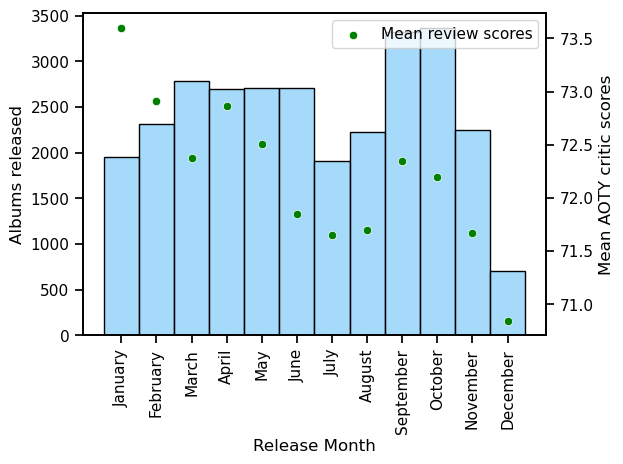

In [461]:
# Releases and ratings by month

fig, ax1 = plt.subplots()

month_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, \
               'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}

timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)

sns.histplot(timed_total['Release Month'], color='lightskyblue', ax=ax1, label='Albums released')
plt.ylabel('Albums released')
plt.xticks(rotation=90)

agg = timed_total.groupby('Release Month').mean().reset_index()
ax2 = ax1.twinx()
sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', ax=ax2, color='green', label='Mean review scores')
plt.ylabel('Mean AOTY critic scores')

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\873316843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\873316843.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = timed_total.groupby('Release Month').mean().reset_index()


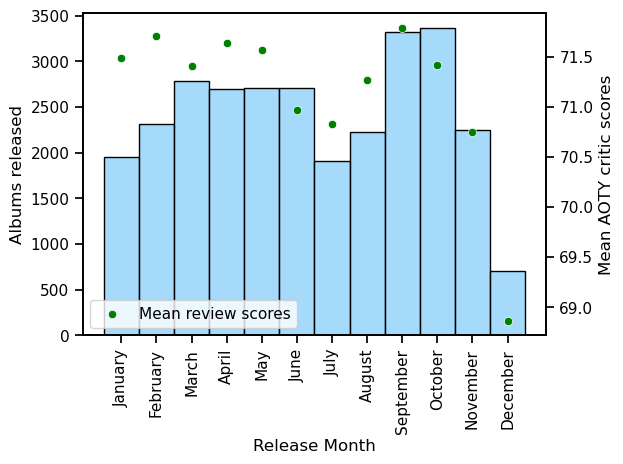

In [462]:
# Releases and ratings by month

fig, ax1 = plt.subplots()

month_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, \
               'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}

timed_total.sort_values('Release Month', key=lambda x: x.map(month_dict), inplace=True)

sns.histplot(timed_total['Release Month'], color='lightskyblue', ax=ax1, label='Albums released')
plt.ylabel('Albums released')
plt.xticks(rotation=90)

agg = timed_total.groupby('Release Month').mean().reset_index()
ax2 = ax1.twinx()
sns.scatterplot(data=agg, x='Release Month', y='AOTY User Score', ax=ax2, color='green', label='Mean review scores')
plt.ylabel('Mean AOTY critic scores')

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


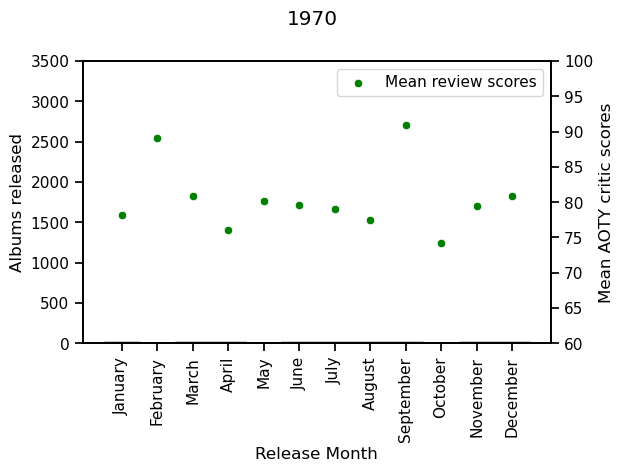

1971
1971


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFr

1972


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1973


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1974


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1975


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1976


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1977


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1978


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1979


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1980


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1981


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1982


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1983


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1984


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1985


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1986


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1987


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1988


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1989


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1990


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1991


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1992


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1993


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1994


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1995


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1996


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1997


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1998


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


1999


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2000


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2001


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2002


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2003


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2004


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2005


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2006


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2007


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2008


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2009


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2010


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2011


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2012


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2013


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2014


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2015


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2016


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2017


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


2018


C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\442479212.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()


<Figure size 640x480 with 0 Axes>

In [464]:
# NOTE: Make a moving bar chart of release months hists per year, moving from 70-19

fig, ax = plt.subplots()

current_year=1970
current_df = timed_total[timed_total['Release Year']==current_year]

hist = sns.histplot(current_df['Release Month'], \
                    color='lightskyblue', label='Albums released', ax=ax)
plt.ylabel('Albums released')
plt.xticks(rotation=90)
plt.ylim(0, 3500)

ax2 = ax.twinx()
agg = current_df.groupby('Release Month').mean().reset_index()
scat = sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', color='green', \
                       label='Mean review scores', ax=ax2)
plt.ylabel('Mean AOTY critic scores')
plt.ylim(60, 100)

fig.suptitle(f'{current_year}')
plt.tight_layout()
plt.show()

def update(frame) :
    global scat

    current_year = 1970+frame
    print(current_year)
    current_df = timed_total[timed_total['Release Year']==current_year]

    ax.clear()

    hist = sns.histplot(current_df['Release Month'], \
                    color='lightskyblue', label='Albums released', ax=ax)
    hist.set_ylabel('Albums released')
    hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
    hist.set_ylim(0, 275)
    
    ax2 = ax.twinx()
    
    scat.remove()

    agg = current_df.groupby('Release Month').mean().reset_index()
    
    scat = sns.scatterplot(data=agg, x='Release Month', y='AOTY Critic Score', color='green', \
                           label='Mean review scores', ax=ax2)
    scat.set_ylabel('Mean AOTY critic scores')
    scat.set_ylim(60, 100)

    fig.suptitle(f'{current_year}')
    plt.tight_layout()

animation = FuncAnimation(fig, update, frames=range(1, 49), interval=500)

animation.save('plot.gif', writer='pillow')

PLOTS
---

In [466]:
post_70_set['Format'].value_counts()

LP    21093
EP     1017
Name: Format, dtype: int64

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\432021052.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


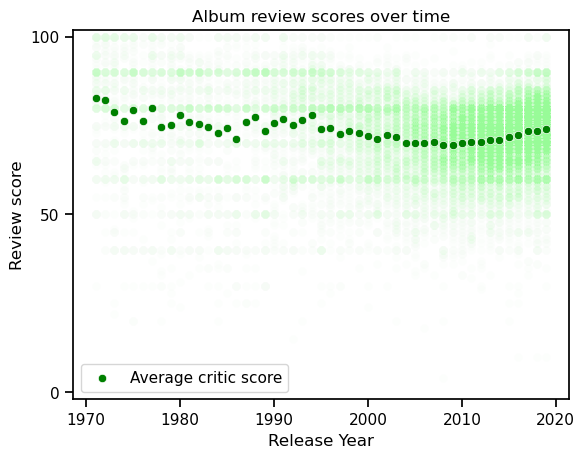

In [492]:
filename = '1 - Critic scores over time'

fig, ax = plt.subplots()

plt.title('Album review scores over time')

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
plt.ylabel('Review score')
plt.yticks([0, 50, 100])
plt.ylim(-2, 102)

mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Average critic score', ax=ax)

plt.legend()
plt.savefig(f'../reports/figures/{filename}')
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\326142971.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


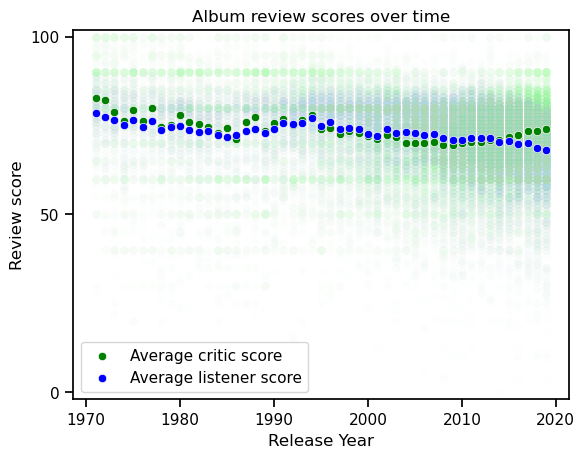

In [484]:
filename = '2 - Critic vs user scores over time'

fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)
# sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic Critic Score', color="Yellow", alpha=0.02, ax=ax)
# sns.scatterplot(data=post_70_set, x='Release Year', y='Metacritic User Score', color="Red", alpha=0.02, ax=ax)
plt.ylabel('Review score')
plt.yticks([0, 50, 100])
plt.ylim(-2, 102)

plt.title('Album review scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Average critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Average listener score', ax=ax)
# sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic Critic Score', color='Yellow', label='MC Critics', ax=ax)
# sns.scatterplot(data=mean_df, x='Release Year', y='Metacritic User Score', color='Red', label='MC Users', ax=ax)


plt.legend()
plt.savefig(f'../reports/figures/{filename}')
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\1499583628.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


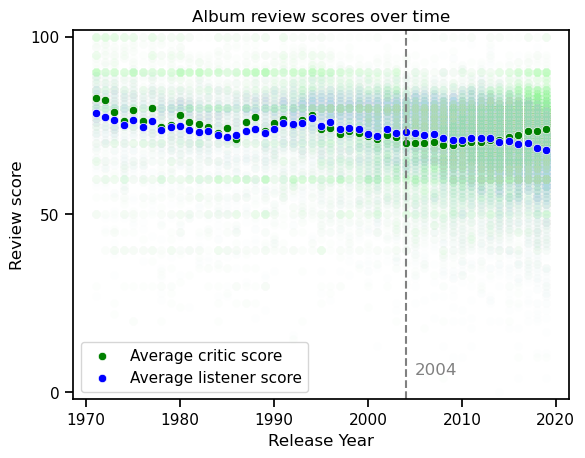

In [490]:
filename = '2-1 - Critic vs user scores over time'

fig, ax = plt.subplots()

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)
plt.ylabel('Review score')
plt.yticks([0, 50, 100])
plt.ylim(-2, 102)

plt.title('Album review scores over time')


mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Average critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Average listener score', ax=ax)

plt.axvline(x=2004, color='Gray', linestyle='--')
plt.annotate('2004', color='Gray', xy=(2005, 5))

plt.legend()
plt.savefig(f'../reports/figures/{filename}')
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\1526602495.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = post_70_set.groupby('Release Year').mean()


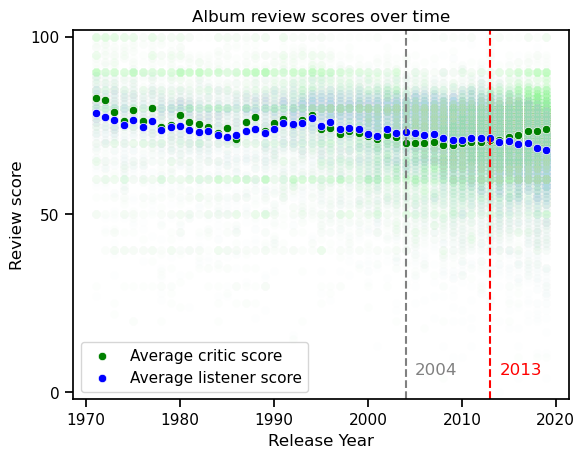

In [491]:
filename = '2-2 - Critic vs user scores over time'

fig, ax = plt.subplots()

plt.title('Album review scores over time')

sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY Critic Score', color="palegreen", alpha=0.02, ax=ax)
sns.scatterplot(data=post_70_set, x='Release Year', y='AOTY User Score', color="lightblue", alpha=0.02, ax=ax)
plt.ylabel('Review score')
plt.yticks([0, 50, 100])
plt.ylim(-2, 102)

mean_df = post_70_set.groupby('Release Year').mean()

sns.scatterplot(data=mean_df, x='Release Year', y='AOTY Critic Score', color='Green', label='Average critic score', ax=ax)
sns.scatterplot(data=mean_df, x='Release Year', y='AOTY User Score', color='Blue', label='Average listener score', ax=ax)

plt.axvline(x=2004, color='Gray', linestyle='--')
plt.annotate('2004', color='Gray', xy=(2005, 5))

plt.axvline(x=2013, color='Red', linestyle='--')
plt.annotate('2013', color='Red', xy=(2014, 5))

plt.legend()
plt.savefig(f'../reports/figures/{filename}')
plt.show()

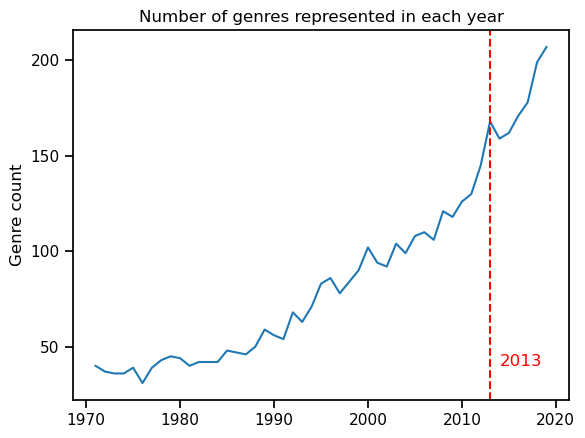

In [472]:
filename = '6 - Genre count over time'

count_df = post_70_set.groupby('Release Year').count()

for year in range(1971, 2020) :
    genres = len(post_70_set[post_70_set['Release Year']==year]['Genre'].unique())
    count_df.loc[year, 'Genres Per Year'] = genres


sns.lineplot(data=count_df, x='Release Year', y='Genres Per Year')
plt.xlabel('')
plt.ylabel('Genre count')
plt.yticks([50, 100, 150, 200])

# plt.axvline(x=2004, color='Gray', linestyle='--')
# plt.annotate('2004', color='Gray', xy=(2005, 40))

plt.axvline(x=2013, color='Red', linestyle='--')
plt.annotate('2013', color='Red', xy=(2014, 40))

plt.title('Number of genres represented in each year')
plt.savefig(f'../reports/figures/{filename}')
plt.show()

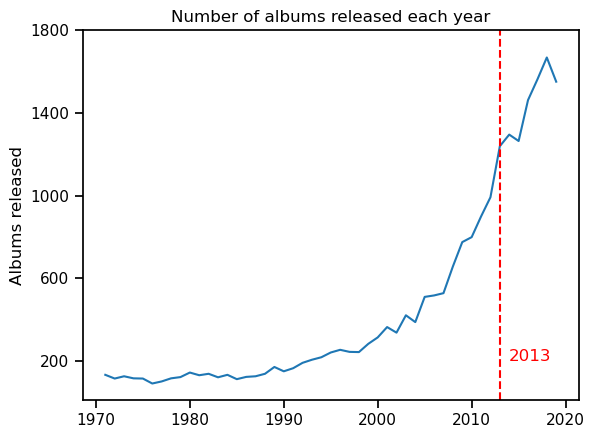

In [473]:
filename = '5 - ALbum count over time'

count_df = post_70_set.groupby('Release Year').count()

sns.lineplot(data=count_df, x='Release Year', y='Title')

# plt.axvline(x=2004, color='Gray', linestyle='--')
# plt.annotate('2004', color='Gray', xy=(2005, 200))

plt.axvline(x=2013, color='Red', linestyle='--')
plt.annotate('2013', color='Red', xy=(2014, 200))
plt.xlabel('')
plt.ylabel('Albums released')
plt.yticks([200, 600, 1000, 1400, 1800])

plt.title('Number of albums released each year')
plt.savefig(f'../reports/figures/{filename}')
plt.show()

In [474]:
count_df.columns

Index(['Artist', 'Title', 'Release Month', 'Release Day', 'Format', 'Label',
       'Genre', 'Metacritic Critic Score', 'Metacritic Reviews',
       'Metacritic User Score', 'Metacritic User Reviews', 'AOTY Critic Score',
       'AOTY Critic Reviews', 'AOTY User Score', 'AOTY User Reviews',
       'Mean AOTY Score', 'Release Decade'],
      dtype='object')

In [475]:
post_70_set['AOTY User Score']

5283     58
3468     78
21946    74
21948    69
21950    69
         ..
9868     65
7880     83
9220     46
11346    77
24674    42
Name: AOTY User Score, Length: 22110, dtype: int64

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2746770942.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\2746770942.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = current_df.groupby('Release Month').mean().reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore ar

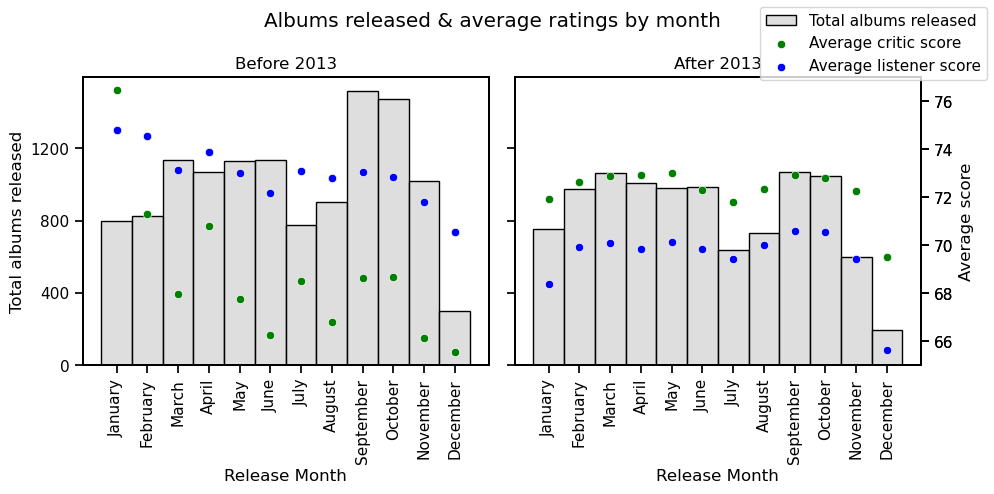

In [493]:
# Releases and ratings by month

filename = '7 - Monthly releases vs ratings'

dividing_year = 2013


fig, (ax1, ax3) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

current_df = post_70_set[post_70_set['Release Year'] < dividing_year]
score = 'AOTY Critic Score'

sns.histplot(current_df['Release Month'], color='lightgray', ax=ax1, label='Total albums released')
ax1.set_ylabel('Total albums released')
ax1.tick_params(axis='x', rotation=90)
ax1.set_yticks([0, 400, 800, 1200, 1600])
ax1.legend().set_visible(False)

agg = current_df.groupby('Release Month').mean().reset_index()
ax2 = ax1.twinx()
sns.scatterplot(data=agg, x='Release Month', y=score, ax=ax2, color='green', label='Average critic score')
# ax2.set_ylim(65, 77)
ax2.set_ylabel('')
ax2.set_yticks([])
ax2.legend().set_visible(False)
plt.title(f'Before {dividing_year}')

ax2_5 = ax1.twinx()

sns.scatterplot(data=agg, x='Release Month', y='AOTY User Score', ax=ax2_5, color='blue', label='Average listener score')
ax2_5.legend().set_visible(False)
ax2_5.set_ylim(65, 77)
ax2_5.set_ylabel('')
ax2_5.set_yticks([])


# ---

current_df = post_70_set[post_70_set['Release Year'] >= dividing_year]

sns.histplot(current_df['Release Month'], color='lightgray', ax=ax3)
ax3.set_ylabel('')
# ax3.set_yticks([])
ax3.tick_params(axis='x', rotation=90)
ax3.legend().set_visible(False)

agg = current_df.groupby('Release Month').mean().reset_index()
ax4 = ax3.twinx()
sns.scatterplot(data=agg, x='Release Month', y=score, ax=ax4, color='green')
ax4.set_ylabel('Average score')
ax4.set_ylim(65, 77)
# ax4.legend().set_visible(False)

plt.title(f'After {dividing_year}')

ax5 = ax3.twinx()
sns.scatterplot(data=agg, x='Release Month', y='AOTY User Score', ax=ax5, color='blue')
# ax5.set_yticks([]).set_visible(False)
ax5.legend().set_visible(False)
ax5.set_ylim(65, 77)
ax5.set_ylabel('')


plt.suptitle('Albums released & average ratings by month')
fig.legend()
plt.tight_layout()
plt.savefig(f'../reports/figures/{filename}')
plt.show()

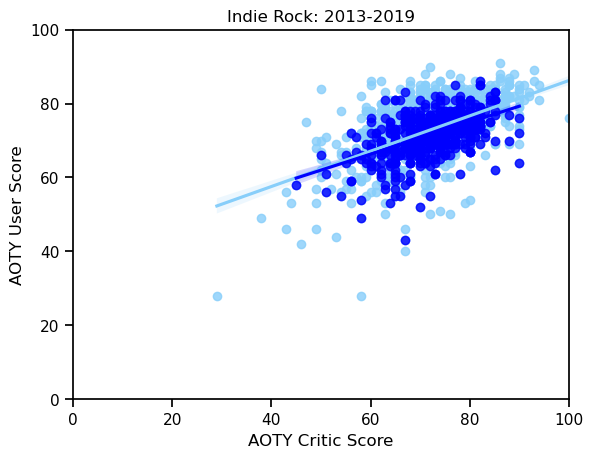

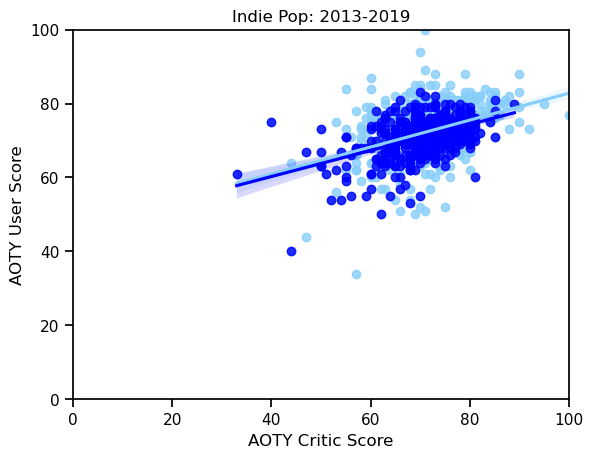

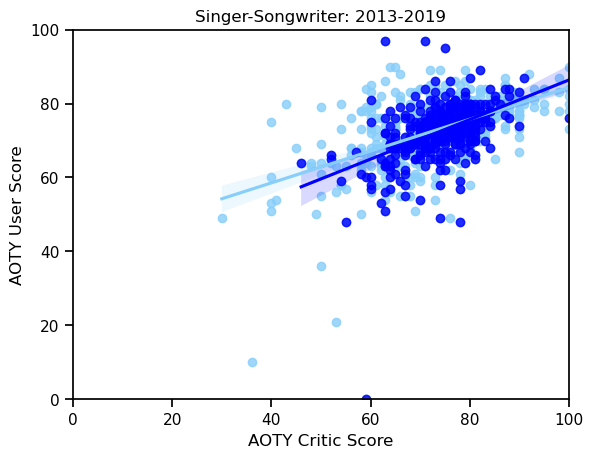

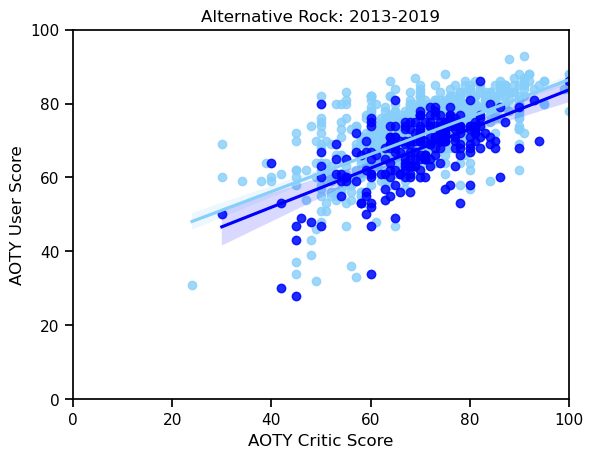

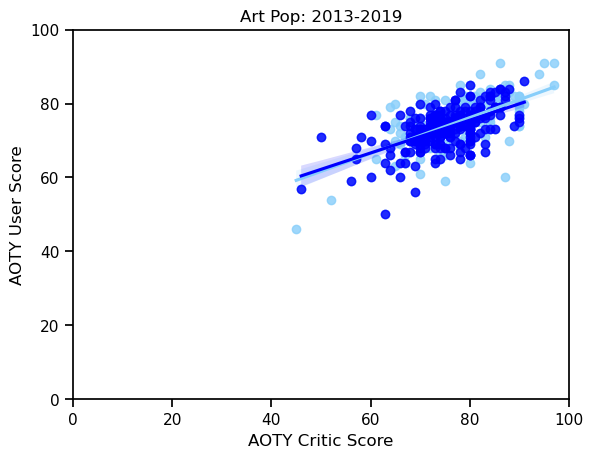

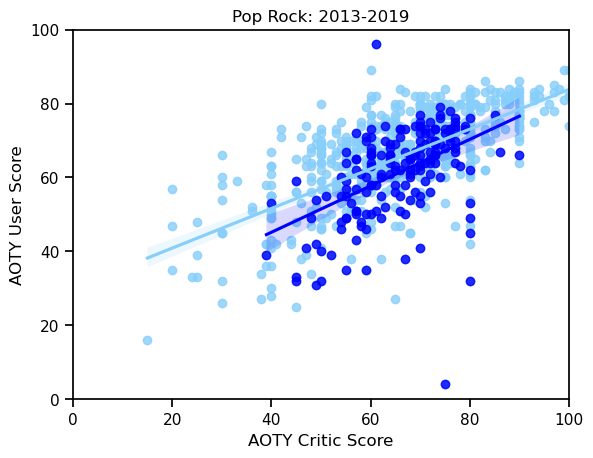

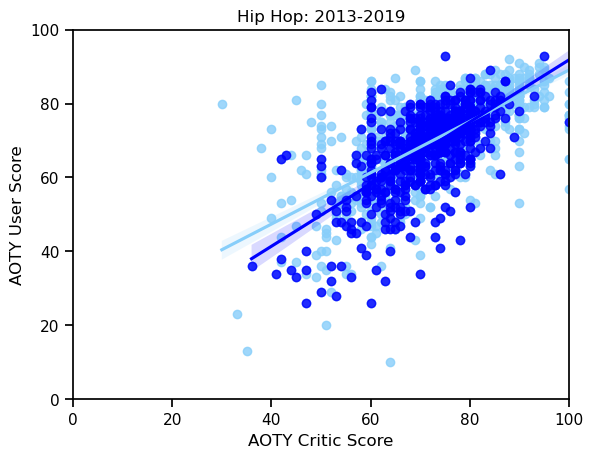

In [477]:
lower_bound = 2013
upper_bound = 2019

year_span_df = post_70_set[(post_70_set['Release Year']>=lower_bound) & (post_70_set['Release Year']<upper_bound)]

for genre in common_genres :
    current_df = post_70_set[post_70_set['Genre']==genre]
    current_bound_df = year_span_df[year_span_df['Genre']==genre]
    sns.regplot(data=current_df, x='AOTY Critic Score', y='AOTY User Score', color="lightskyblue")
    sns.regplot(data=current_bound_df, x='AOTY Critic Score', y='AOTY User Score', color='blue')
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title(f'{genre}: {lower_bound}-{upper_bound}')
    plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\3354250449.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_df = post_70_set.groupby('Release Year').var()


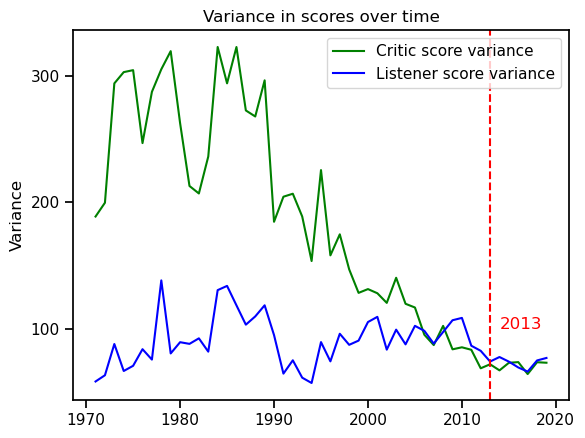

In [494]:
# Charting changes in variance of scores over time

filename = '3 - Variance over time'

var_df = post_70_set.groupby('Release Year').var()

sns.lineplot(data=var_df, x='Release Year', y='AOTY Critic Score', color='green', label='Critic score variance')
sns.lineplot(data=var_df, x='Release Year', y='AOTY User Score', color='Blue', label='Listener score variance')
plt.ylabel('Variance')
plt.xlabel('')
plt.yticks([100, 200, 300])
plt.axvline(x=2013, color='Red', linestyle='--')
plt.annotate('2013', color='Red', xy=(2014, 100))
plt.title('Variance in scores over time')
plt.legend
plt.savefig(f'../reports/figures/{filename}')
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_56976\56940501.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = post_70_set.groupby('Release Year').mean()


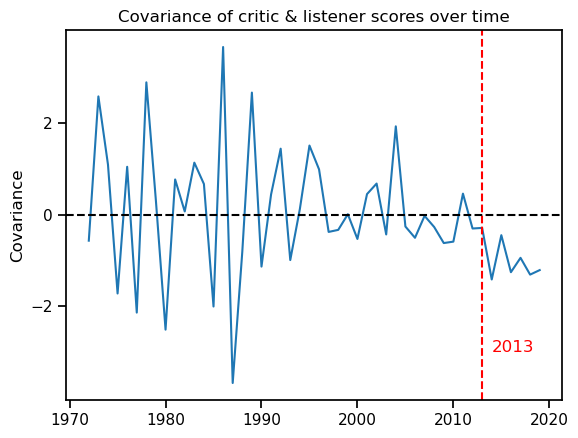

In [521]:
# Correlation of critic & user scores over time

filename = '4 - Covariance over time'

grouped_df = post_70_set.groupby('Release Year').mean()

for year in range(1972, 2020) :
    current_df = post_70_set[post_70_set['Release Year']==year]
    last_df = post_70_set[post_70_set['Release Year']==year-1]
    critic_diff = current_df['AOTY Critic Score'].mean() - last_df['AOTY Critic Score'].mean()
    user_diff = current_df['AOTY User Score'].mean() - last_df['AOTY User Score'].mean()
    # corr_df = current_df.corr()
    # value = corr_df.loc['AOTY Critic Score', 'AOTY User Score']
    value = user_diff - critic_diff
    grouped_df.loc[year, 'Corr Score'] = value

sns.lineplot(x=grouped_df.index, y=grouped_df['Corr Score'])
plt.axvline(x=2013, linestyle='--', color='Red')
plt.axhline(y=0, linestyle='--', color='Black')
plt.annotate('2013', color='Red', xy=(2014, -3))
plt.yticks([-2, 0, 2])
plt.ylabel('Covariance')
plt.xlabel('')
plt.title('Covariance of critic & listener scores over time')
plt.savefig(f'../reports/figures/{filename}')
plt.show()

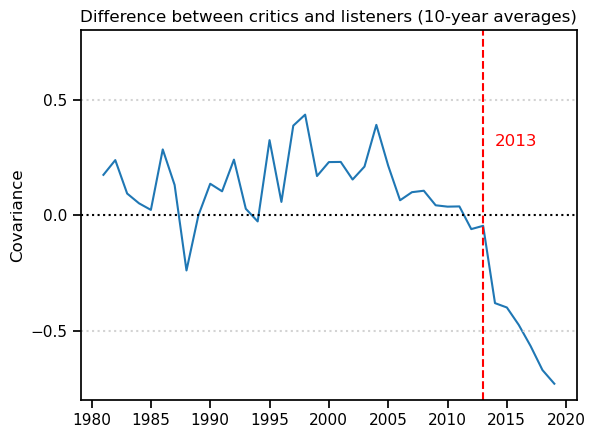

In [541]:
# Correlation of critic & user scores over time

filename = 'X - 3-year rolling average'

# grouped_df = post_70_set.groupby('Release Year').mean()

window_size = 10

for year in range(1981, 2020) :
    summer = 0
    for i in range(window_size) :
        summer += grouped_df.loc[year-i, 'Corr Score']
    value = summer/window_size
    

    # current_df = post_70_set[post_70_set['Release Year']==year]
    # last_df = post_70_set[post_70_set['Release Year']==year-1]
    # critic_diff = current_df['AOTY Critic Score'].mean() - last_df['AOTY Critic Score'].mean()
    # user_diff = current_df['AOTY User Score'].mean() - last_df['AOTY User Score'].mean()
    # # corr_df = current_df.corr()
    # # value = corr_df.loc['AOTY Critic Score', 'AOTY User Score']
    # value = user_diff - critic_diff
    grouped_df.loc[year, 'Rolling Corr Average'] = value

sns.lineplot(x=grouped_df.index, y=grouped_df['Rolling Corr Average'])
plt.axvline(x=2013, linestyle='--', color='Red')
plt.axhline(y=0, linestyle=':', color='Black')
plt.annotate('2013', color='Red', xy=(2014, .3))
plt.ylim(-.8, .8)
plt.axhline(y=0.5, color='lightgray', linestyle=':')
plt.axhline(y=-0.5, color='lightgray', linestyle=':')
plt.yticks([-.5, 0, .5])
plt.ylabel('Covariance')
plt.xlabel('')
plt.title('Difference between critics and listeners (10-year averages)')
plt.savefig(f'../reports/figures/{filename}')
plt.show()